
# Démo des 4 modes 

In [3]:

%matplotlib inline

import importlib

import feeling
import utils

importlib.reload(feeling)
importlib.reload(utils)

from scripts.run import (
    prepare_data_and_model,
    run_oneword_mode,
    run_shortseq_mode,
    run_dataloader_mode,
    run_train_mode,
)


In [4]:

# Préparation commune (vocab, datasets, loaders, modèle)
ctx = prepare_data_and_model()
ctx.keys()


Chargement ok (vocab et labels partagés)
vocab_size = 5260 | n_labels = 6


dict_keys(['shared_vocab', 'shared_label2id', 'train_dataset', 'val_dataset', 'test_dataset', 'train_loader', 'val_loader', 'test_loader', 'class_weights', 'model'])

## 1) Mode — oneword

#### but : test du modèle sur un mot isolé : vérifie qu’il traite correctement un seul token.

In [5]:

run_oneword_mode(ctx)



== TEST 1 : un mot (B=1, T=1) ==
[ONE WORD] mot='i' -> logits.shape=(1, 6) ; pred_id=2


## 2) Mode — shortseq

#### but : test du modèle sur une courte séquence (3 mots) : vérifie la récurrence et la mémoire du RNN

In [6]:

run_shortseq_mode(ctx)



== TEST 2 : séquence courte (B=1, T=3) ==
[SHORT SEQ] phrase='i didnt feel' -> X.shape=(1, 35, 5260) ; logits.shape=(1, 6)


## 3) Mode — dataloader

#### but : test du DataLoader pour vérifier que les batchs et longueurs sont gérés correctement

In [7]:

run_dataloader_mode(ctx)



== TEST 3 : DataLoader (batch > 1) ==
[DATALOADER] batch X=(64, 35, 5260) ; logits=(64, 6) ; acc_batch=29.69%


## 4) Mode — train

#### but : entraînement complet du modèle sur les données d’entraînement, puis évaluation finale sur le test

on a obtenu 85.95% de précision sur le jeu de test à un moment et c'est sur ca qu'on a basé notre rapport (par contre les courbes et la matrice dans le rapport correspondent bien à cette précision de 85.95)


== TRAIN ==


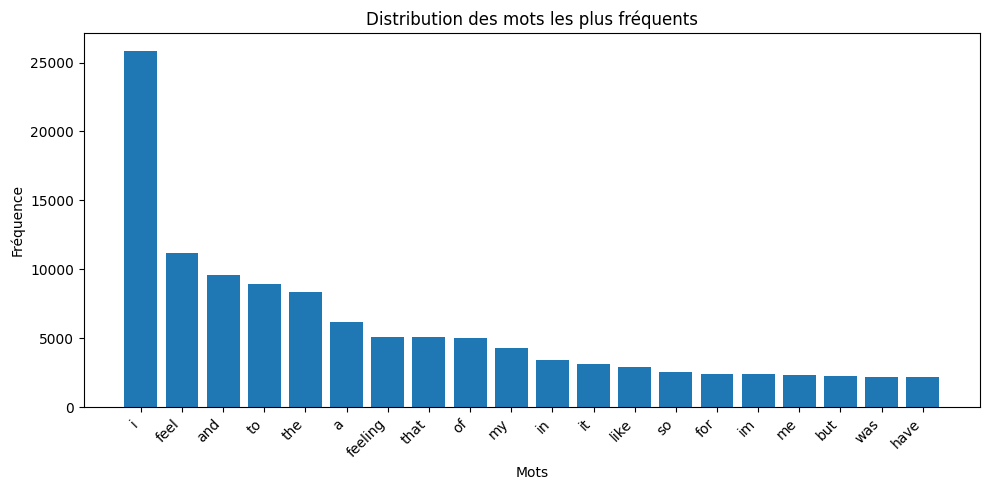

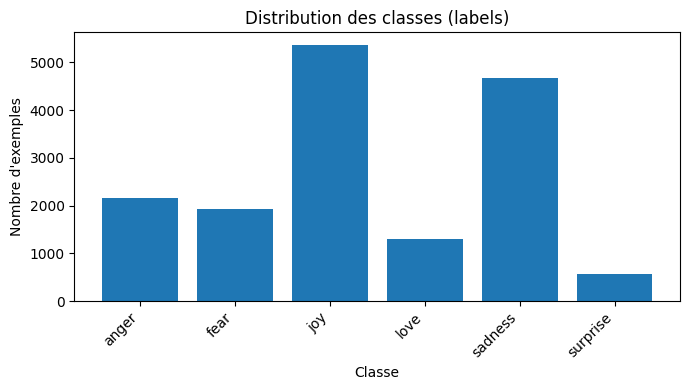

== Longueurs ==
train: {'n': 16000, 'mean': 19.1663125, 'median': 17.0, 'max': 66, 'truncated_%': np.float64(9.168750000000001)}
val  : {'n': 2000, 'mean': 18.866, 'median': 17.0, 'max': 61, 'truncated_%': np.float64(8.05)}
test : {'n': 2000, 'mean': 19.154, 'median': 17.0, 'max': 61, 'truncated_%': np.float64(9.0)}
== OOV (% de mots hors vocab train) ==
val  : 5.08%
test : 5.06%
Epoch 1: Train loss 1.7915, Val loss 1.7919, Val acc 27.70%
Epoch 2: Train loss 1.7838, Val loss 1.7746, Val acc 43.65%
Epoch 3: Train loss 1.5634, Val loss 1.3335, Val acc 46.00%
Epoch 4: Train loss 1.1408, Val loss 1.1060, Val acc 69.45%
Epoch 5: Train loss 0.7971, Val loss 0.8551, Val acc 79.55%
Epoch 6: Train loss 0.5818, Val loss 0.6460, Val acc 83.60%
Epoch 7: Train loss 0.4278, Val loss 0.5976, Val acc 84.60%
Epoch 8: Train loss 0.3140, Val loss 0.5447, Val acc 85.10%
Epoch 9: Train loss 0.2637, Val loss 0.5986, Val acc 85.00%
Epoch 10: Train loss 0.2322, Val loss 0.4946, Val acc 85.15%
Epoch 11: Train 

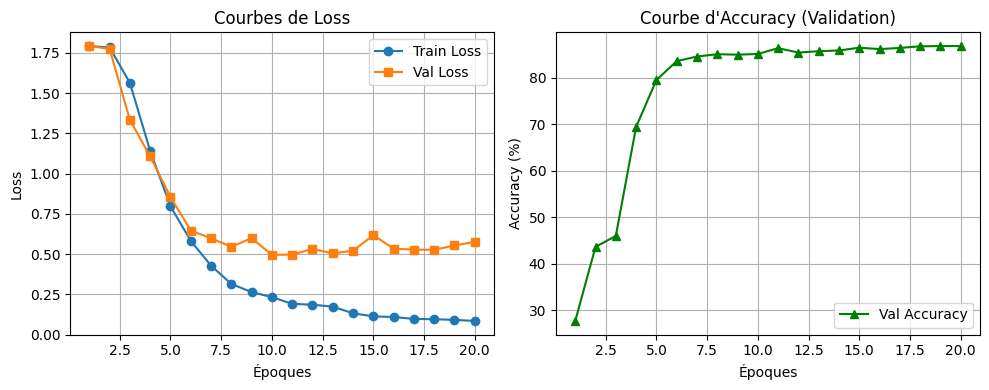

Test loss: 0.5527, Test accuracy: 84.80%


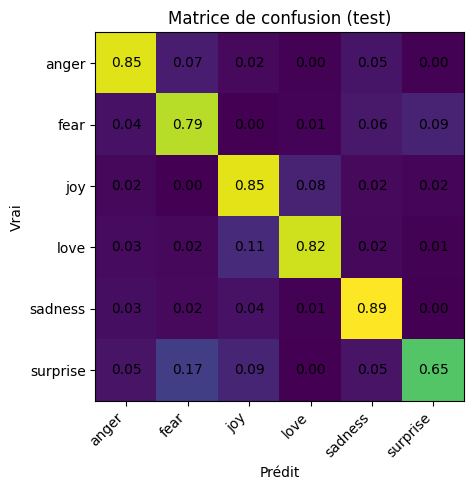


Classification report :
              precision    recall  f1-score   support

       anger       0.82      0.85      0.83       275
        fear       0.78      0.79      0.79       224
         joy       0.92      0.85      0.88       695
        love       0.67      0.82      0.74       159
     sadness       0.91      0.89      0.90       581
    surprise       0.56      0.65      0.60        66

    accuracy                           0.85      2000
   macro avg       0.78      0.81      0.79      2000
weighted avg       0.86      0.85      0.85      2000



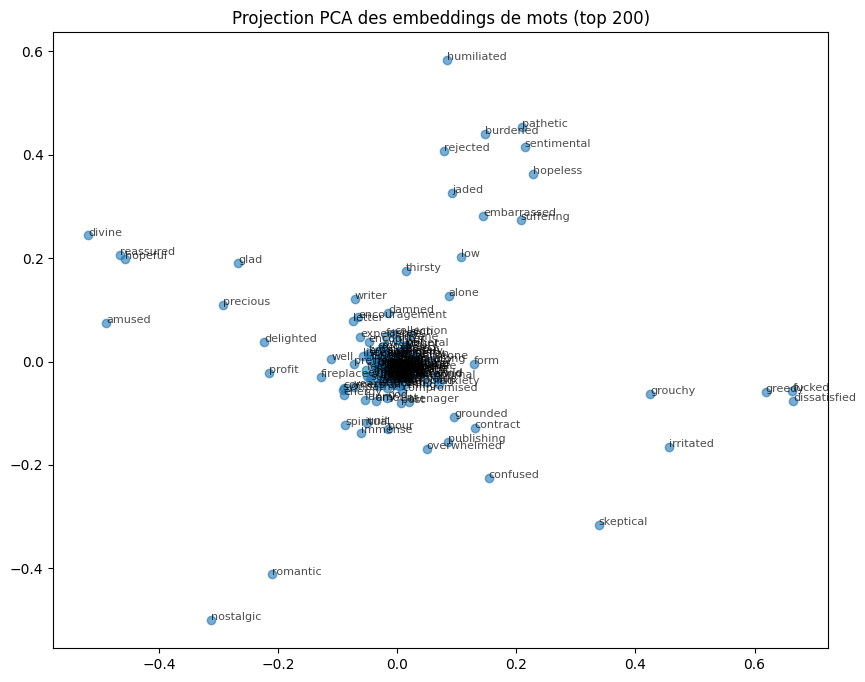

In [8]:

run_train_mode(ctx)
